<H1> Data Pre-Processing and Visualisation

<h2> Instructions:
<p>

1.	Write a Python program to solve each of the tasks described below.
2.	Upload your solution python notebook file  to Blackboard before the end of the deadline.  
3.	Once you have submitted your file you should verify that you have correctly uploaded it. It is your responsibility to make sure you upload the correct file.  
4.	Please make sure you fully comment your code.
5.	Use comments to clearly indicate the question that each code segment is related to.
6.	Please put your student name and number as comments at the top of your python file

In the lab assessment folder you will find a dataset called importsAuto.csv containing information about second hand cars. It contains in total 24 features (columns) describing each car such as the make, number of doors, engine-size, price, etc. The following is a full list of the features (please note that the questions that follow will focus on a subset of these features).

 1. make: alfa-romero, audi, bmw, chevrolet, dodge honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
 2. fuel-type:                diesel, gas.
 3. aspiration:               std, turbo.
 4. num-of-doors:             four, two.
 5. body-style:               hardtop, wagon, sedan, hatchback, convertible.
 6. drive-wheels:             4wd, fwd, rwd.
 7. engine-location:          front, rear.
 8. wheel-base:               continuous from 86.6 120.9.
 9. length:                   continuous from 141.1 to 208.1.
 10. width:                    continuous from 60.3 to 72.3.
 11. height:                   continuous from 47.8 to 59.8.
 12. curb-weight:              continuous from 1488 to 4066.
 13. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 14. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 15. engine-size:              continuous from 61 to 326.
 16. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 17. bore:                     continuous from 2.54 to 3.94.
 18. stroke:                   continuous from 2.07 to 4.17.
 19. compression-ratio:        continuous from 7 to 23.
 20. horsepower:               continuous from 48 to 288.
 21. peak-rpm:                 continuous from 4150 to 6600.
 22. city-mpg:                 continuous from 13 to 49.
 23. highway-mpg:              continuous from 16 to 54.
 24. price:                    continuous from 5118 to 45400.

T00229173 Adrian Han Lim Oah

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> Question 1.
<p>
1. Print out the make, engine-size and price of each car in the dataset.

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/importsAuto.csv")
df.head(5)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,NaN,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22,17450


In [5]:
df[['make', 'engine-size', 'price']].head(10)

,make,engine-size,price
0,alfa-romero,130,13495
1,alfa-romero,130,16500
2,alfa-romero,152,16500
3,audi,109,13950
4,audi,136,17450
5,audi,136,15250
6,audi,136,17710
7,audi,136,18920
8,audi,131,23875
9,bmw,108,16430


2. Write a program that will ask the user to specify and upper and lower price value and it should print out the make, engine-size, horsepower and price of all cars that meet that specification. In the example below the user specifies a lower price bound of 5000 and an upper price of 5250. The program then outputs the relevant details of all cars that satisfy these constraints.

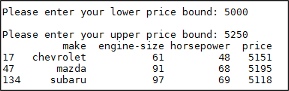

In [6]:
lowerBound = int(input("Please enter your lower price bound: "))
upperBound = int(input("Please enter your upper price bound: "))

res = df.loc[(df['price'] >= lowerBound) & (df['price']<= upperBound)][['make','engine-size','horsepower','price']]
res

Please enter your lower price bound: 5000
Please enter your upper price bound: 5250


,make,engine-size,horsepower,price
17,chevrolet,61,48,5151
47,mazda,91,68,5195
134,subaru,97,68,5118


3. Calculate the mean price for all cars in the dataset. Next print out a list of all car makes that have an associated price greater than the mean car price. Please note you should not include any duplicate entries in the list. The following is the output that your code should produce:

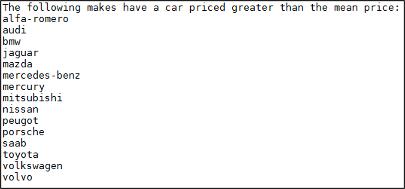

In [7]:
meanPrice = df['price'].mean()
abvAvg = df[df['price']> meanPrice]['make'].unique()

print('The following makes have a car priced greater than the mean price: ')
for make in abvAvg:
  print(make)

The following makes have a car priced greater than the mean price: 
alfa-romero
audi
bmw
jaguar
mazda
mercedes-benz
mercury
mitsubishi
nissan
peugot
porsche
saab
toyota
volkswagen
volvo


<h2> Question 2
<p>

1. Write code (you may write it as a function) that will calculate the mean selling price for each car make.
Visualize your results using a horizontal bar graph as shown below.

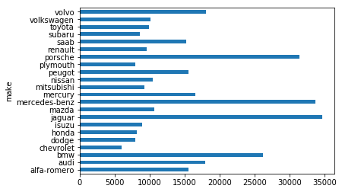


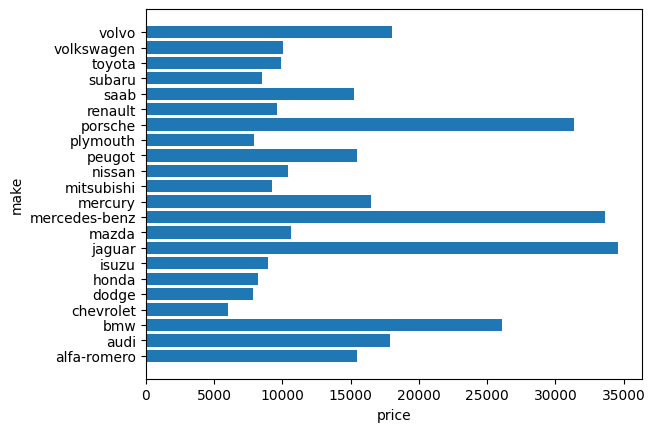

In [8]:
meanPrices = df.groupby('make')['price'].mean()
makes = meanPrices.index

plt.barh(meanPrices.index, meanPrices)
plt.xlabel('price')
plt.ylabel('make')

plt.show()

2. In this question we are interested in looking at the relationship between the engine-size column and price. Create a scatter plot that maps the price feature against the engine-size feature.

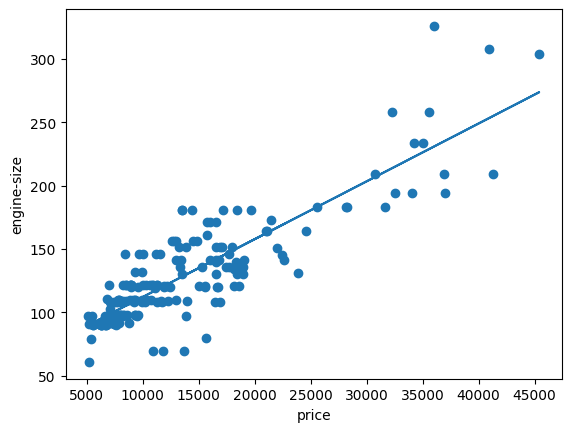

In [23]:
plt.scatter(df['price'], df['engine-size'])

maxPrice = df['price'].max()

m, b = np.polyfit(df['price'], df['engine-size'], 1)
plt.plot(df['price'], m*df['price'] + b)

plt.xlabel('price')

plt.ylabel('engine-size')

plt.show()

<h2> Question 3
<p>

1. There are a number of missing values in the ‘city-mpg’ column. Replace all missing values in the city-mpg column with the median value of the city-mpg column.

In [14]:
print(df['city-mpg'].head(10))
print(df['city-mpg'].fillna(df['city-mpg'].median()).head(10))

0    21.0
1     NaN
2    19.0
3    24.0
4    18.0
5    19.0
6    19.0
7    19.0
8    17.0
9    23.0
Name: city-mpg, dtype: float64
0    21.0
1    24.0
2    19.0
3    24.0
4    18.0
5    19.0
6    19.0
7    19.0
8    17.0
9    23.0
Name: city-mpg, dtype: float64


2. At the moment the column “num-of-doors” contains two String values (“two” or “four”). Use the apply function to transform the existing values to integer values. Therefore, within the “num-of-doors” column any occurrence of the string “two” should be replaced with the integer value 2 and any occurrence of the string “four” should be replaced by the integer value 4. When you have finished the transformation, print out the first 20 entries in the “num-of-doors” column. Your output should look the same as below. Finally, you should save the new dataframe to a csv file.

In [22]:
new_df = df.copy()
new_df['num-of-doors'].replace('two',2, inplace=True)
new_df['num-of-doors'].replace('four',4, inplace=True)

print(new_df['num-of-doors'].head(20))

df.to_csv('/content/drive/MyDrive/Colab Notebooks/importsAuto-cleaned.csv')

0     2
1     2
2     2
3     4
4     4
5     2
6     4
7     4
8     4
9     2
10    4
11    2
12    4
13    4
14    4
15    2
16    4
17    2
18    2
19    4
Name: num-of-doors, dtype: int64
